In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

We consider the dual of the support vector machine (L2-regularized hinge loss based binary classifier). The original optimization problem of this classification can be represented as

$$\hat{w}=argmin_{w\in \mathbb{R}}(\sum\limits_{i=1}^{n}max(0,1-y_i w^T x_i)+\lambda||w||_2^2)$$

where $x_i \in \mathbb{R}^d$, $w \in \mathbb{R}^d$, $y_i \in {±1}$, and $\lambda > 0$ denotes $i$-th input variable, the parameter vector, and the label for $i$-th input data, and a coefficient of the regularization term, respectively.

Equivalent problem:

\begin{align*}
&\min_{w,\xi}\,\, \mathbf{1}^T \mathbf{\xi} + \lambda \mathbf{w}^T \mathbf{w}\\
&s.t.\quad
\begin{cases}
\xi_i \geq 1-y_i \mathbf{w}^T \mathbf{x_i} & (i=1,2,3,\cdots,n)\\
\mathbf{\xi} \geq 0
\end{cases}
\end{align*}

Scaling by $C = \frac{1}{2\lambda}>0$,

\begin{align*}
&\min_{w,\xi}\,\, C \mathbf{1}^T \mathbf{\xi} + \frac{1}{2} \mathbf{w}^T\mathbf{w}\\
&s.t.\quad
\begin{cases}
1-y_i \mathbf{w}^T \mathbf{x_i}-\xi_i \leq 0 & (i=1,2,3,\cdots,n)\\
-\mathbf{\xi} \leq 0
\end{cases}
\end{align*}

Lagrange function:
$$L(w,\xi,\alpha,\beta) = \frac{1}{2} \mathbf{w}^T\mathbf{w} + C \mathbf{1}^T \mathbf{\xi} + \sum\limits_{i=1}^{n}\alpha_i(1-y_i w^T x_i-\xi_i)-\beta^T \xi$$

KKT Condition:

\begin{align*}
&\frac{\partial L}{\partial w} = w - \sum\limits_{i=1}^{n}\alpha_i y_i x_i =0 \\
&\frac{\partial L}{\partial \xi} = C \mathbf{1} - \alpha - \beta =0\\
&1-y_i w^T w - \xi_i \leq 0 & (i=1,2,3,\cdots,n) \\
&-\xi \leq 0\\
&\alpha_i (1-y_i w^T w - \xi_i) = 0 & (i=1,2,3,\cdots,n) \\
&-\beta_i \xi_ i = 0 & (i=1,2,3,\cdots,n) \\
&\alpha \geq 0 \\
&\beta \geq 0
\end{align*}

Lagrange dual function:
$$\hat{L}(\alpha,\beta) = \inf_{w,\xi}L(w, \xi, \alpha, \beta)$$
thus,
\begin{align*}
&\frac{\partial L}{\partial w} = w - \sum\limits_{i=1}^{n}\alpha_i y_i x_i &\Rightarrow &\hat{w} = \sum\limits_{i=1}^{n}\alpha_i y_i x_i &\\
&\frac{\partial L}{\partial \xi} = C \mathbf{1} - \alpha - \beta &\Rightarrow &\alpha = C \mathbf{1} - \beta &\Rightarrow \alpha \leq \frac{1}{2\lambda}\\
\end{align*}
thus,
\begin{align*}
\hat{L}(\alpha,\beta) &= -\frac{1}{2}\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n}\alpha_i \alpha_j y_i y_j x_i^T x_j+\sum\limits_{i=1}^{n}\alpha_i\\
&= -\frac{1}{2} \alpha^T K \alpha + \alpha^T \mathbf{1}
\end{align*}
where $K \in \mathbb{R}^{n×n}$ denotes a symmetric square matrix, and its $i$-th row and $j$-th column
element can be represented by $y_iy_jx_i^T x_j$ .

let $\alpha' = 2\lambda\alpha$, 
\begin{align*}
&\min_{\alpha}\,\, \hat{L}(\alpha,\beta) = -\frac{1}{2} \alpha^T K \alpha + \alpha^T \mathbf{1}\\
&s.t.\quad
0 \leq \alpha' \leq 1
\end{align*}

In addition,
$$\hat{w} = \frac{1}{2\lambda}\sum\limits_{i=1}^{n}\alpha_i y_i x_i$$

In [2]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

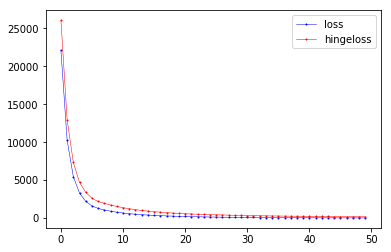

In [78]:
alpha_hist = []
loss_hist = []
hingeloss_hist = []

x = x_d4
y = y_d4

n = x.shape[0]

num_iter = 50
lam = 0.01

learning_rate = 0.0001

x_hat = np.hstack([x,np.ones([x.shape[0],1])])

alpha = np.random.uniform(size = [n, 1])
y = y.reshape(-1,1)

K = np.zeros([n, n])

for i in range(n):
    for j in range(n):
        K[i, j] = y[i]*y[j]*np.dot(x_hat[i].T, x_hat[j])

for t in range(1,num_iter+1):
    
    alpha = np.minimum(np.maximum( alpha - learning_rate * (1/(2*lam) * K.dot(alpha)-1), 0), 1)
    
    loss = 1/(4*lam) * np.dot(np.dot(alpha.T, K), alpha) - np.sum(alpha)
    loss_hist.append(loss.reshape(-1))
    
    w = np.zeros([x_hat.shape[1],1])
    for i in range(n):
        w += 1/(2*lam) * (alpha[i]*y[i]*x_hat[i]).reshape(-1,1)
    hingeloss = +1.0/n * np.sum(np.maximum(np.zeros(len(y)),1-y*np.dot(x_hat, w))) + lam * np.sum(w*w)
    hingeloss_hist.append(hingeloss)
        
plt.plot(loss_hist, 'bo-', linewidth=0.5, markersize=1, label='loss')
plt.plot(hingeloss_hist, 'ro-', linewidth=0.5, markersize=1, label='hingeloss')
plt.legend()

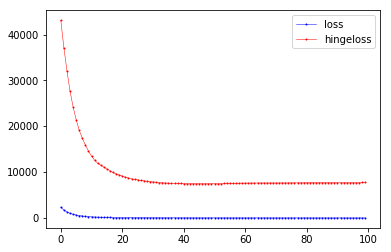

In [80]:
alpha_hist = []
loss_hist = []
hingeloss_hist = []

x = x_d4
y = y_d4

n = x.shape[0]

num_iter = 100
lam = 0.001

x_hat = np.hstack([x,np.ones([x.shape[0],1])])

alpha = np.random.uniform(size = [n, 1])
y = y.reshape(-1,1)

K = np.zeros([n, n])

for i in range(n):
    for j in range(n):
        K[i, j] = y[i]*y[j]*np.dot(x_hat[i].T, x_hat[j])

for t in range(1,num_iter+1):
    
    loss = 1/2 * np.dot(np.dot(alpha.T, K), alpha) - np.sum(alpha)
    loss_hist.append(loss.reshape(-1))
    
    w = np.zeros([x_hat.shape[1],1])
    for i in range(n):
        w += (alpha[i]*y[i]*x_hat[i]).reshape(-1,1)
    hingeloss = np.sum(np.maximum(np.zeros(len(y)),1-y*np.dot(x_hat, w))) + lam * np.sum(w*w)
    hingeloss_hist.append(hingeloss)
    
    alpha = np.maximum( alpha - lam * (K.dot(alpha)-1), 0)

plt.plot(loss_hist, 'bo-', linewidth=0.5, markersize=1, label='loss')
plt.plot(hingeloss_hist, 'ro-', linewidth=0.5, markersize=1, label='hingeloss')
plt.legend()